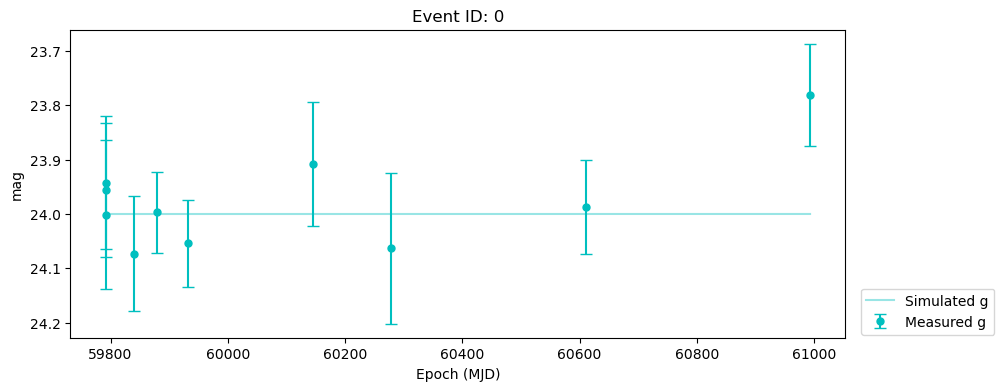

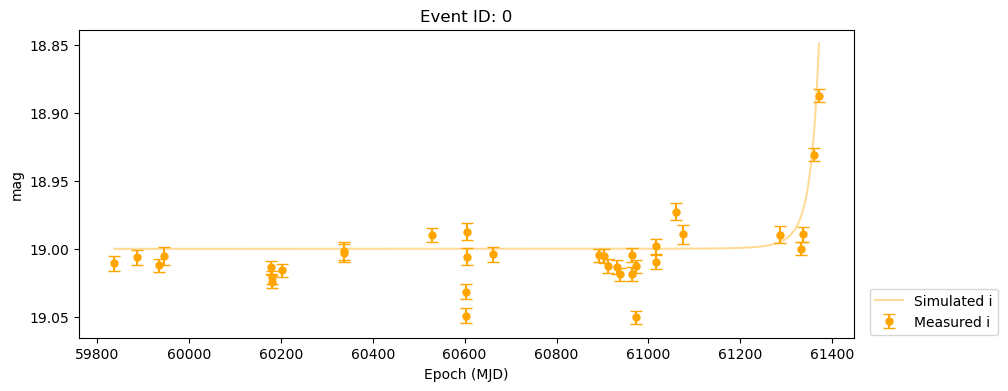

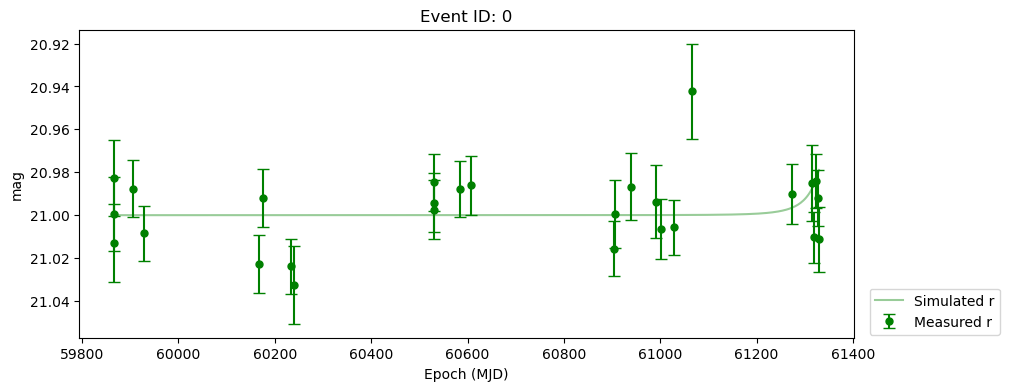

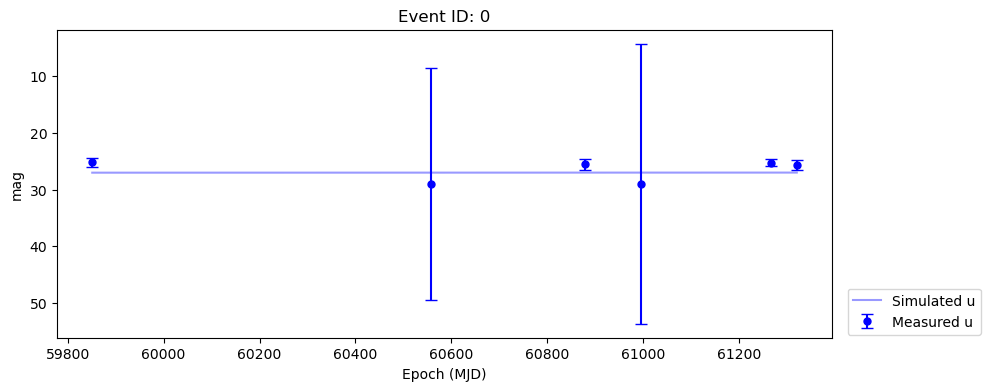

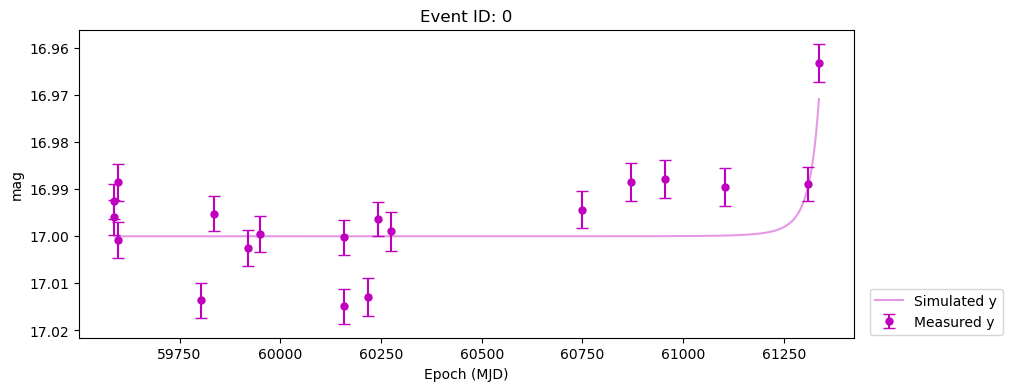

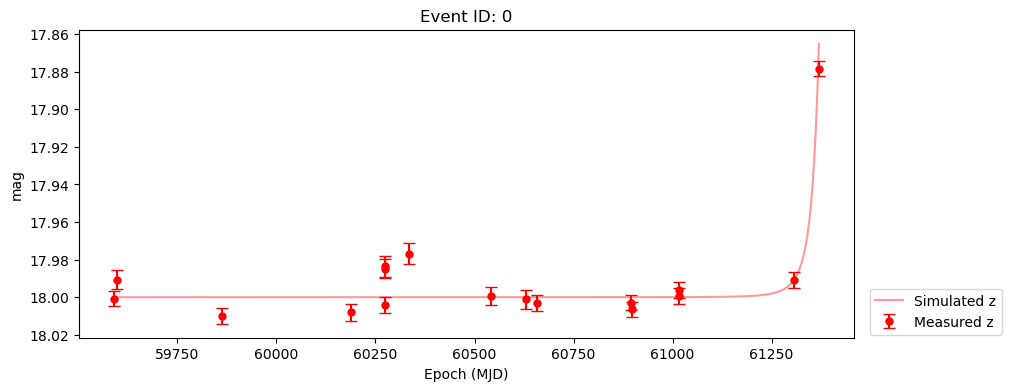

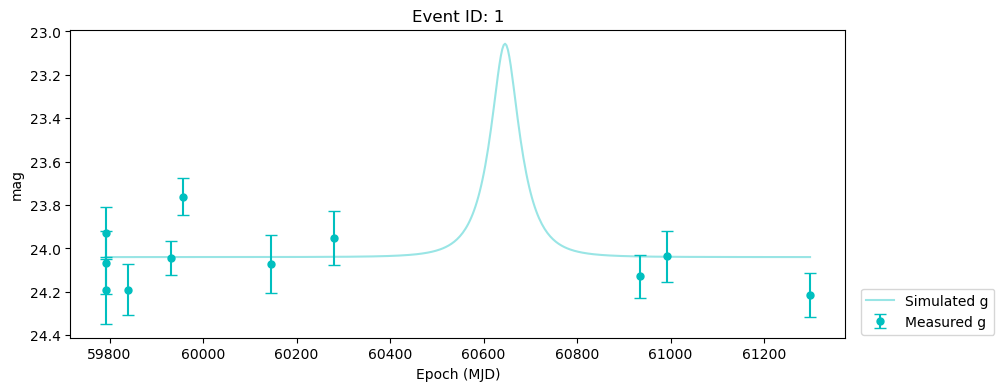

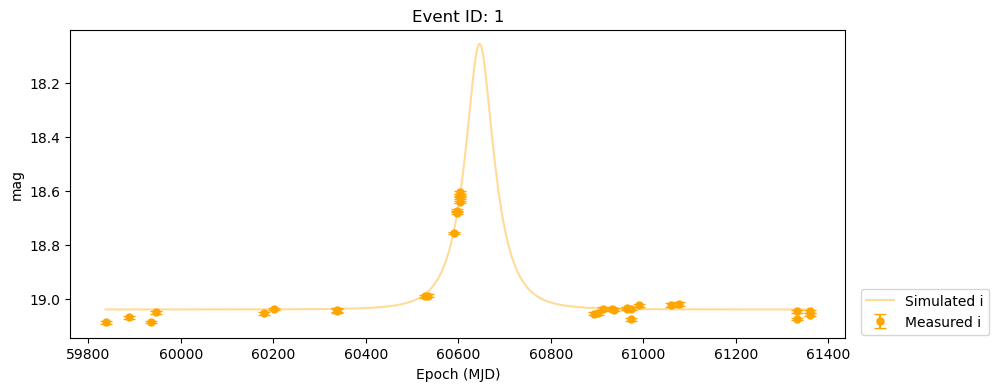

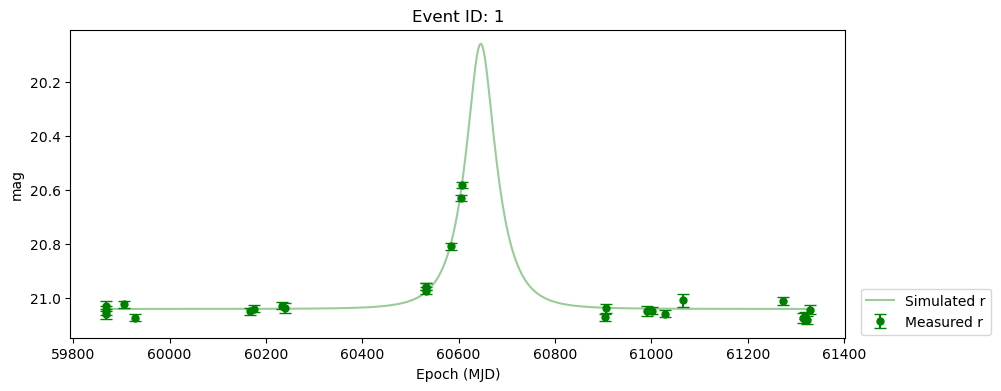

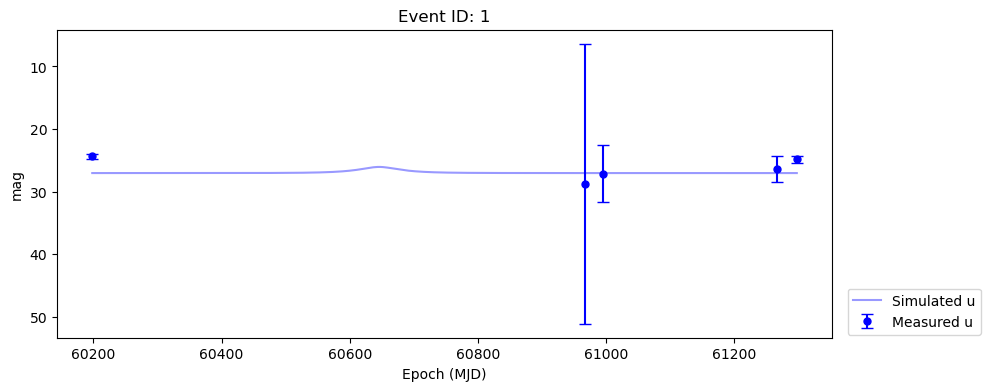

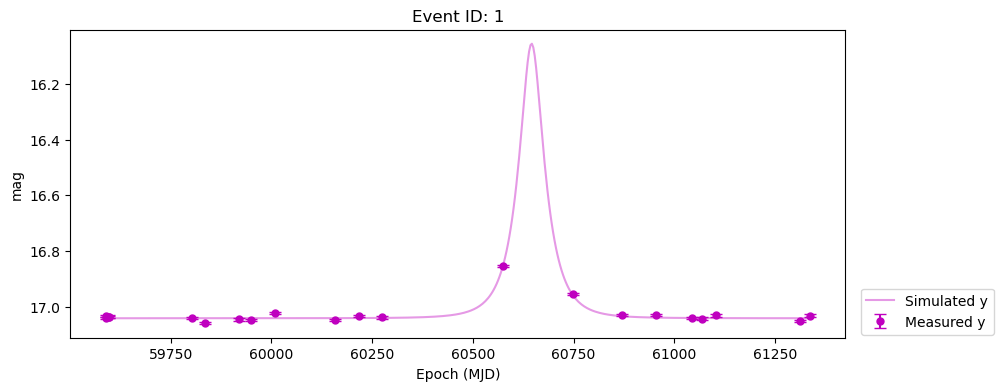

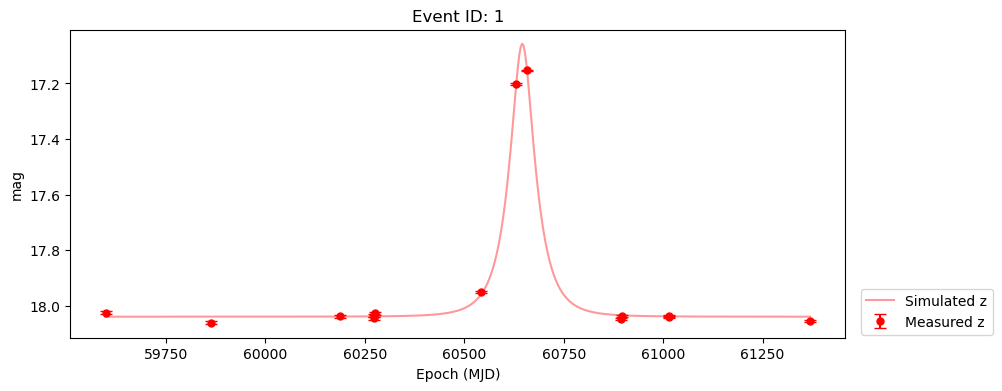

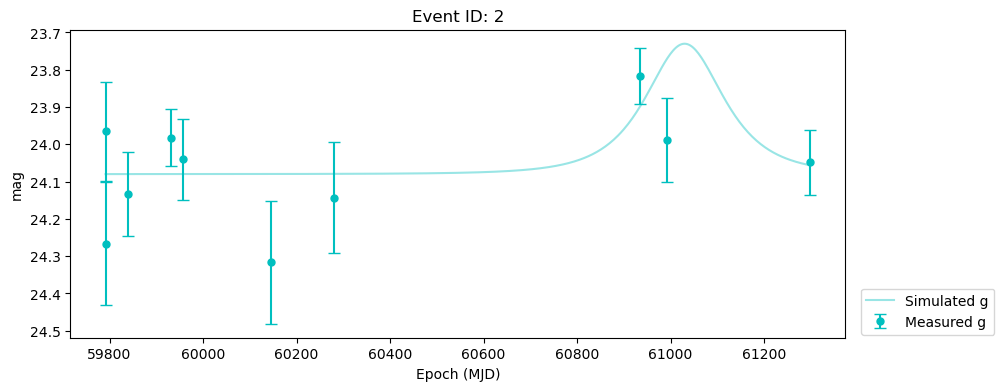

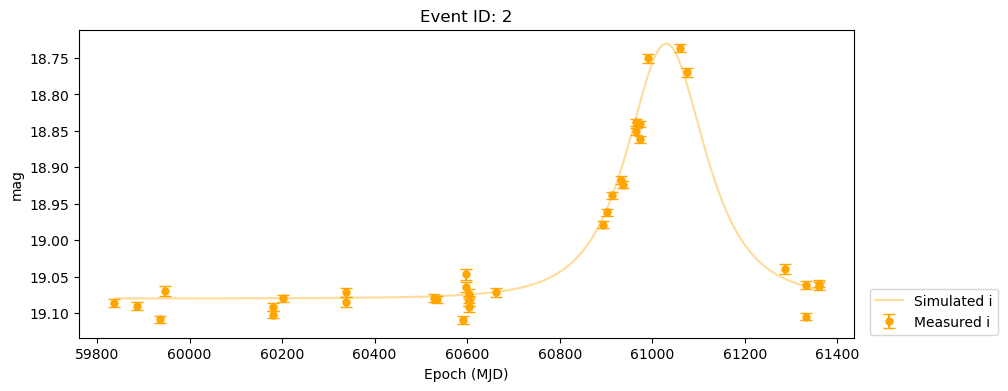

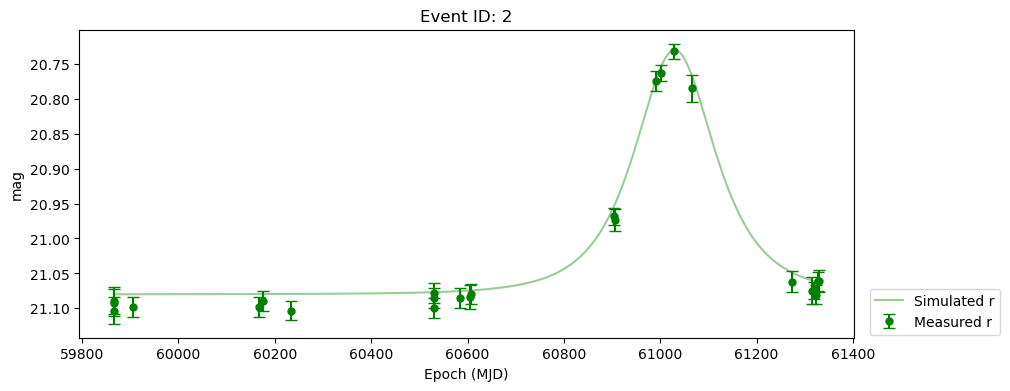

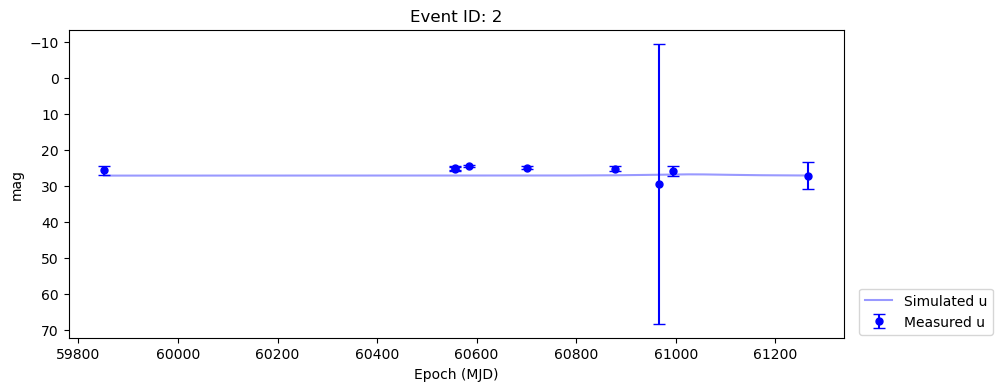

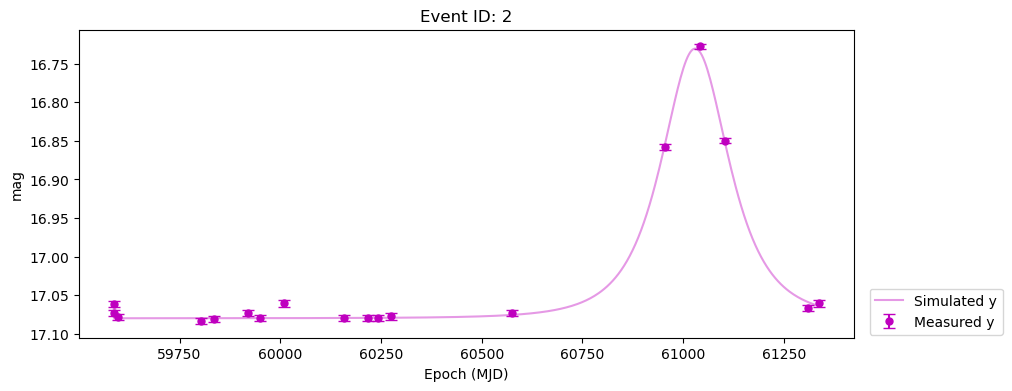

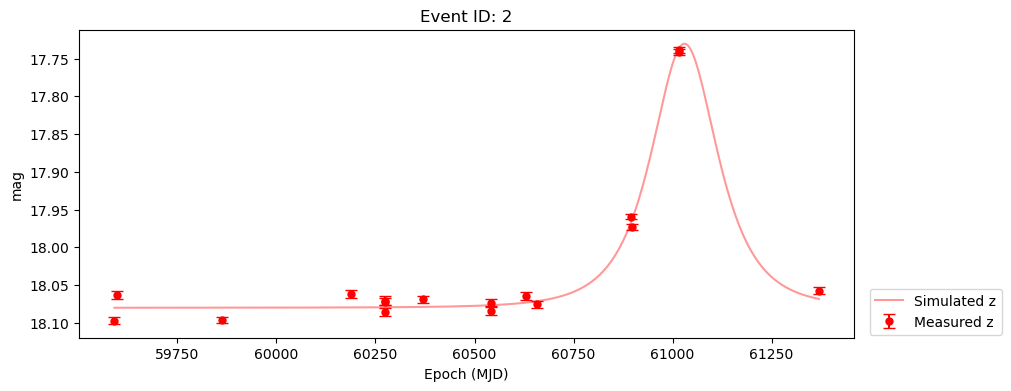

In [3]:
from light_curves import LightCurve
path = "runs/run_1000dens_02rad_ugrizy_1000calexps/"
path = 
events_id = np.arange(3)
join=False
show = False  if join else True
data_event = pd.read_csv(path+"data_events.csv")
for i in events_id:
    lc_list = sorted([file for file in os.listdir(path) if file.startswith("lc") and file.split("_")[1] == str(i)])
    for j, lc_path in enumerate(lc_list):
        lc = LightCurve(data=pd.read_csv(path+lc_path))
        lc.band = lc_path.split(".")[-2][-1]
        lc.model = "Pacz"
        data_lc = data_event[(data_event["event_id"]==i) & (data_event["band"]==lc.band)]
        t_0, t_E, u_0, m_base = data_lc[["t_0", "t_E", "u_0", "m_base"]].values[0]
        lc.params = {}
        for key, val in zip(["t_0", "t_E", "u_0", "m_base"], [t_0, t_E, u_0, m_base]):
            lc.params[key] = val
        if j==5 and join:
            show=True
        lc.plot(title = f"Event ID: {i}", mag_lim=None, show=show)
    show=False if join else True

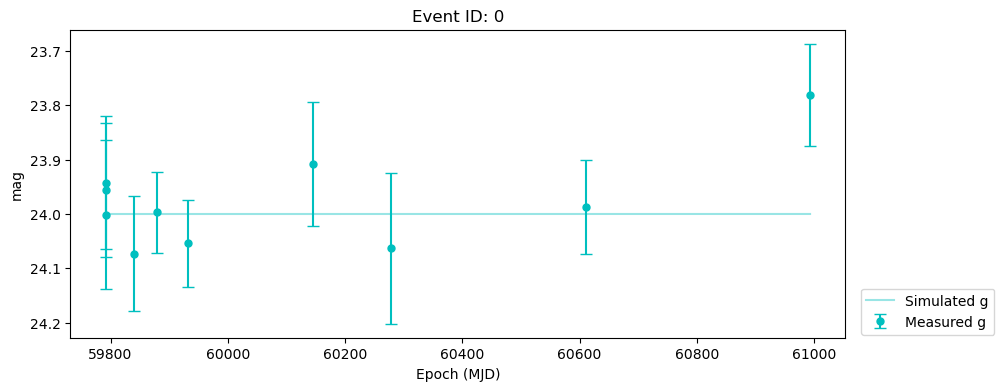

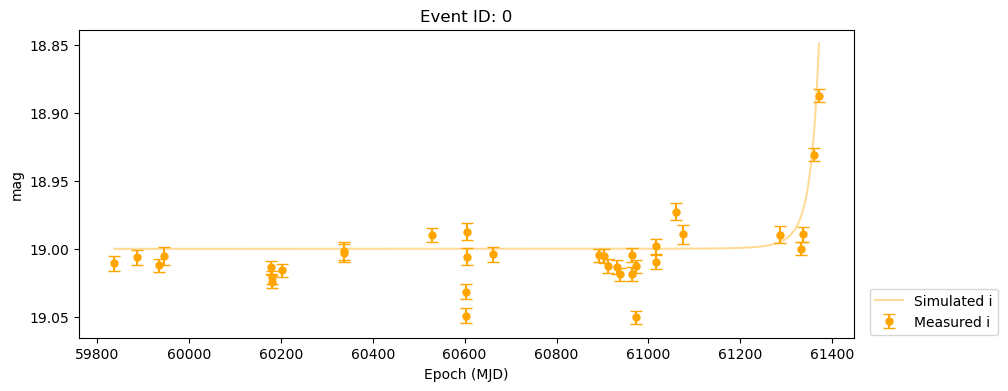

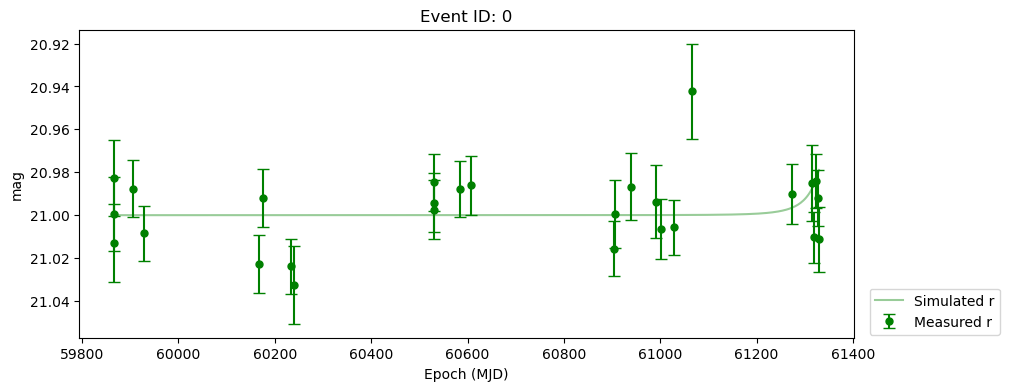

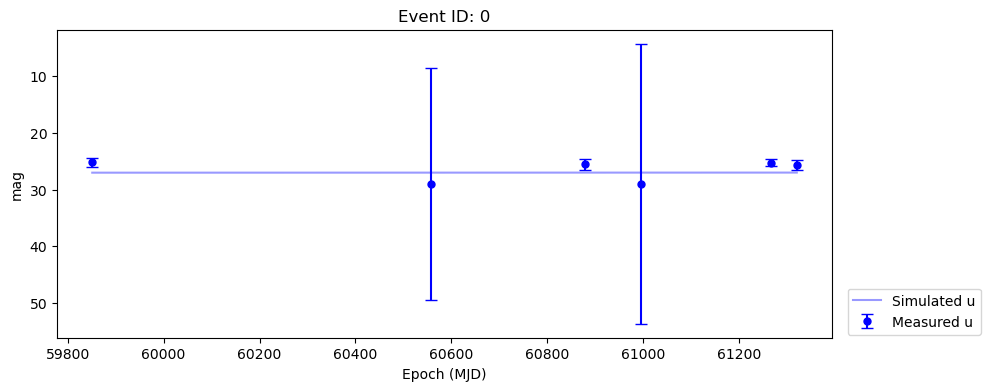

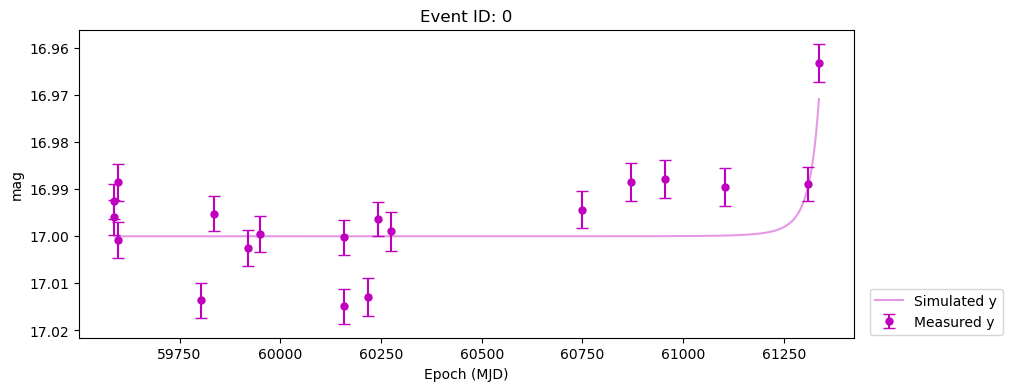

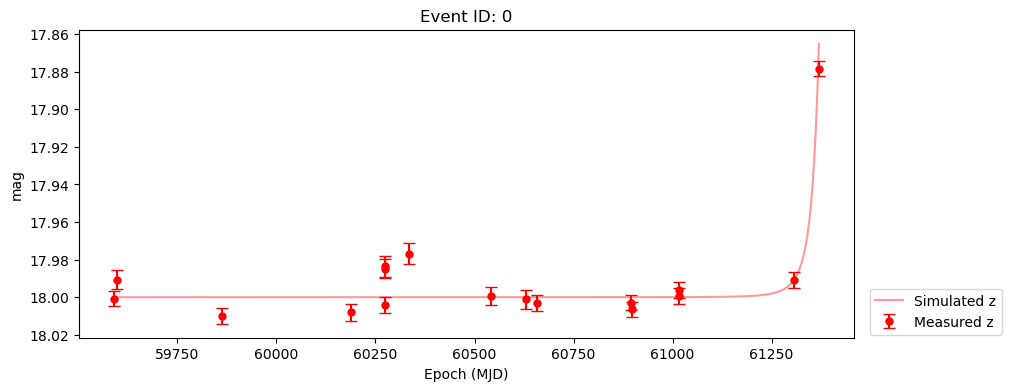

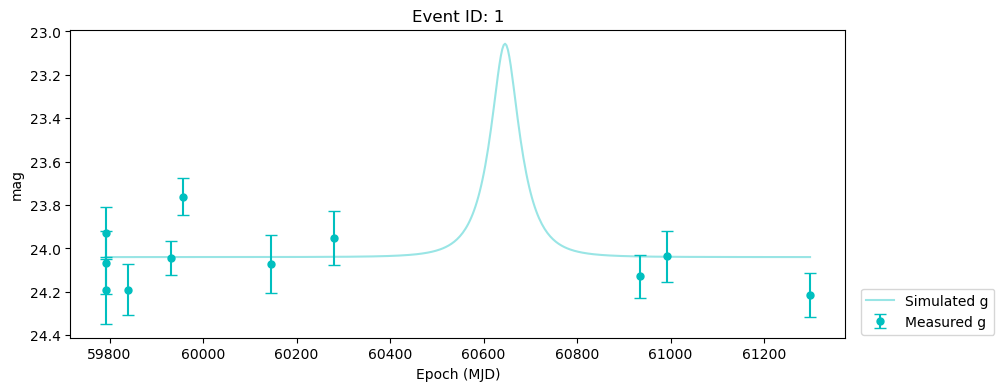

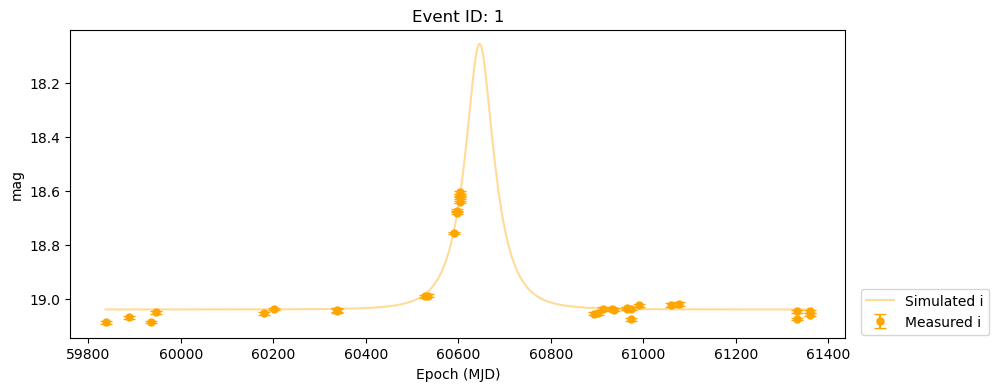

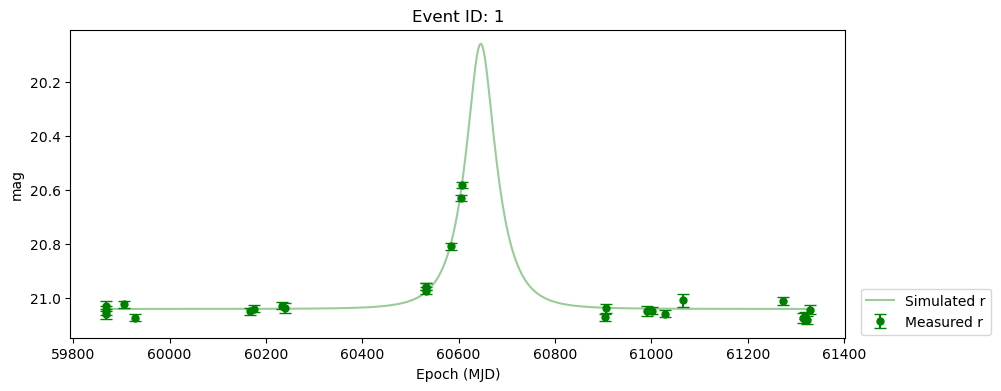

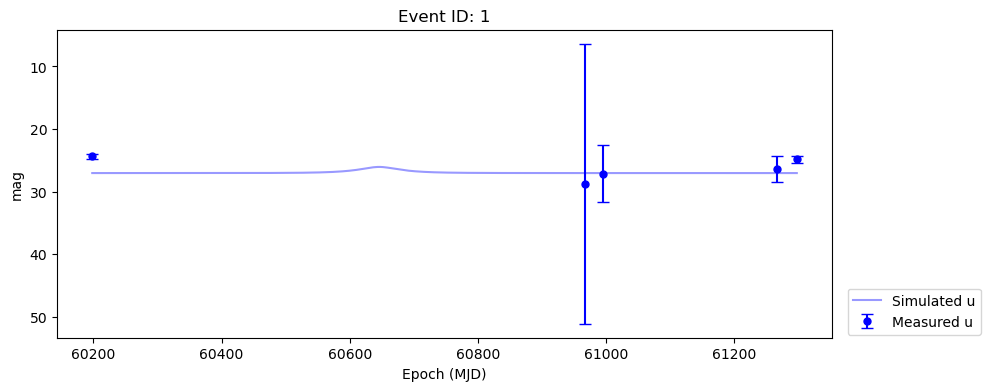

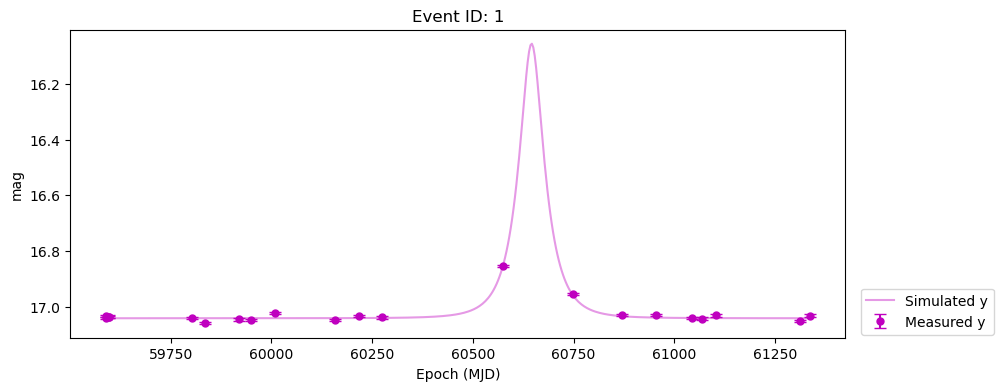

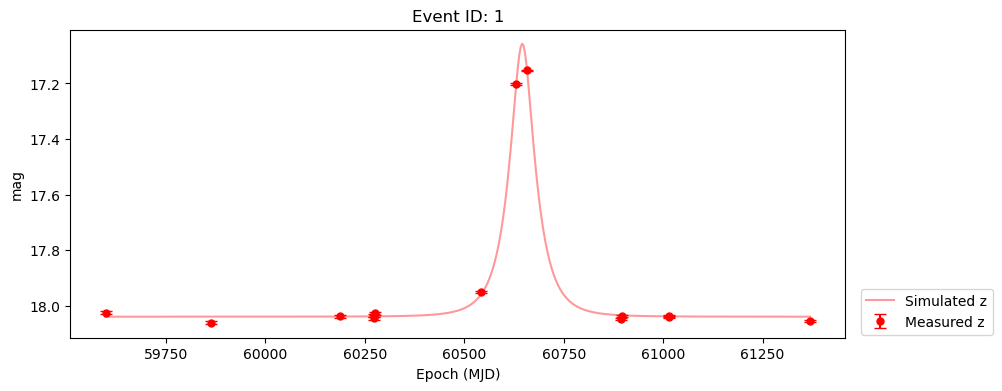

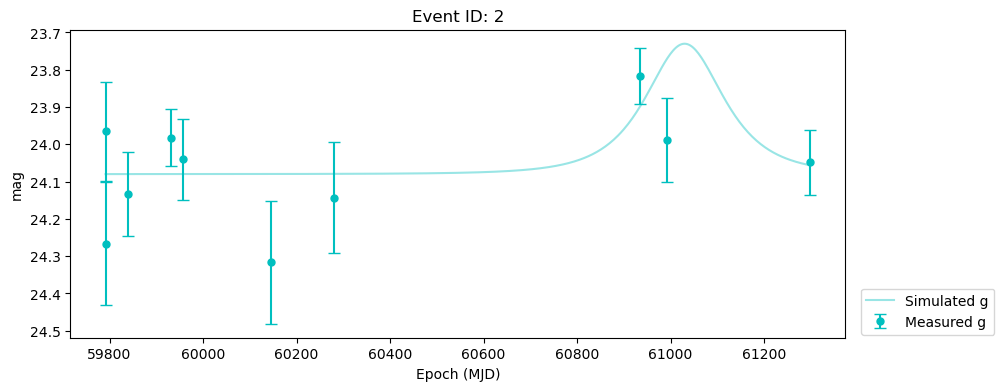

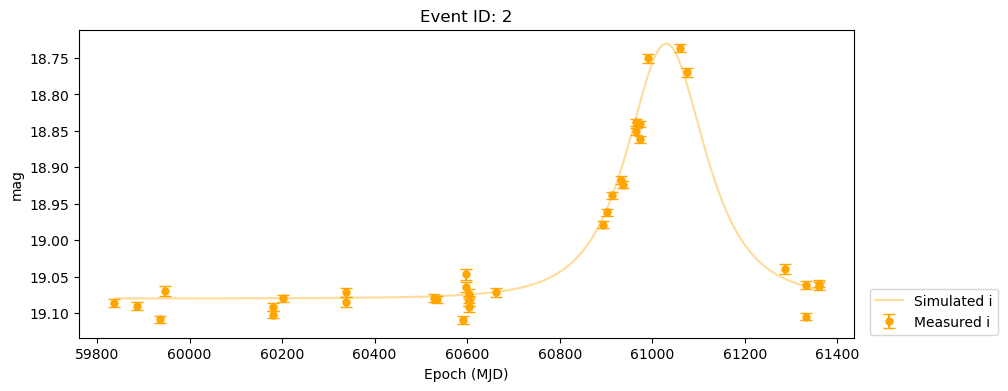

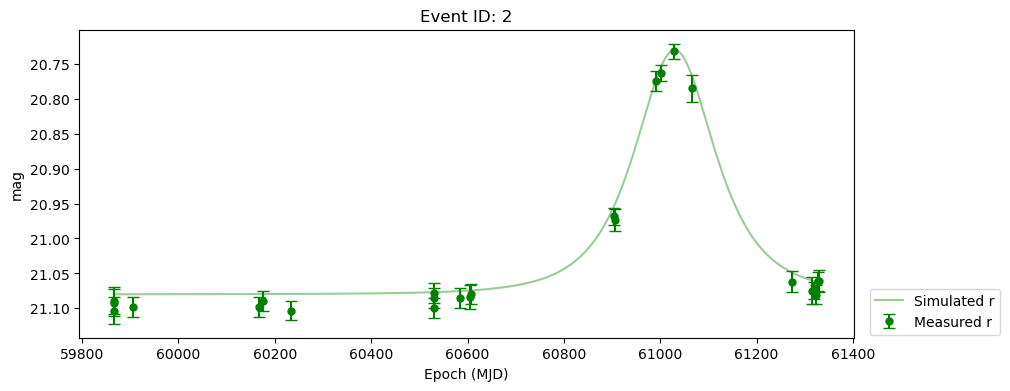

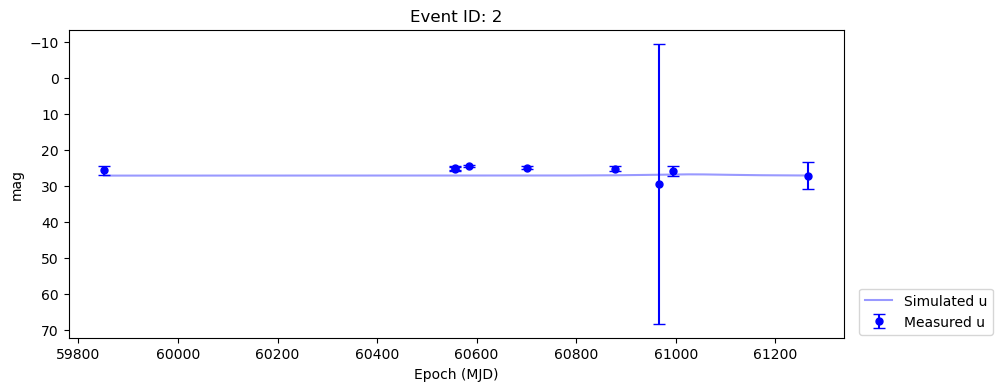

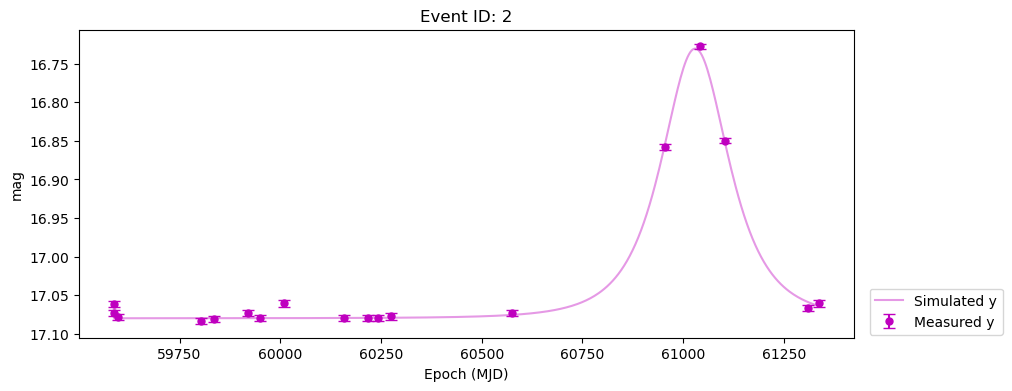

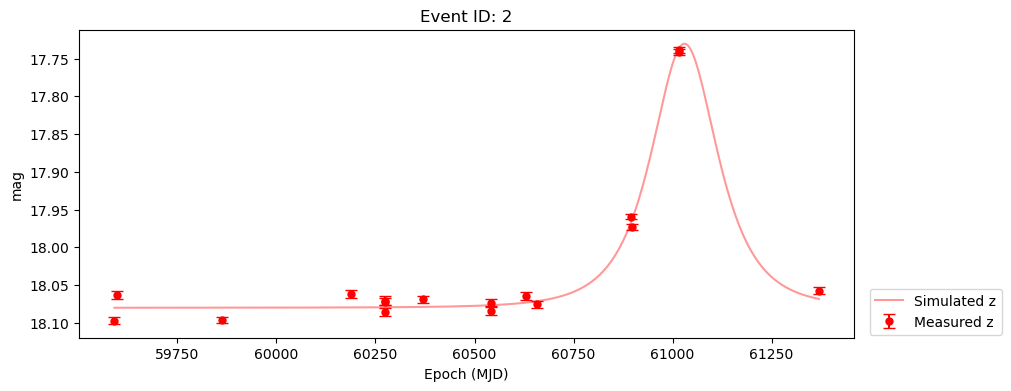

In [5]:
from task import plot_event
import numpy as np
import pandas as pd
path = "runs/run_1000dens_03rad_ugrizy/"
path = "runs/run_1000dens_02rad_ugrizy_1000calexps/"
plot_event(path, events_id = np.arange(3), mag_lim=None, join=False)

In [1]:
from task import Run, plot_event
import numpy as np
path = "runs/run_1000dens_02rad_ugrizy_1000calexps/"
run = Run(name="run_1000dens_02rad_ugrizy_1000calexps")
# plot_event(path)

Loading data from ./runs/run_1000dens_02rad_ugrizy_1000calexps/run_1000dens_02rad_ugrizy_1000calexps_log.txt
57.59451632893858 -32.481152201226145 ugrizy overlap ForcedMeas 1000.0 0.2 126
Log saved in: ./runs/run_1000dens_02rad_ugrizy_1000calexps/run_1000dens_02rad_ugrizy_1000calexps_log.txt


In [9]:
from light_curves import LightCurve
lc = LightCurve(path="runs/run_1000dens_02rad_ugrizy_1000calexps/lc_9_i.csv")

In [11]:
lc.model = "Pacz"
lc.plot()

TypeError: light_curves.LightCurve.plot.<locals>.Pacz() argument after ** must be a mapping, not NoneType

In [1]:
from light_curves import LightCurve
import matplotlib.pyplot as plt
import pandas as pd
show = False
# path = "runs/run_1000dens_03rad_ugrizy/"
path = "runs/run_1000dens_02rad_ugrizy_1000calexps/"
for i in range(5):
    lc_list = sorted([file for file in os.listdir(path) if file.startswith("lc") and file.split("_")[1] == str(i)])
    for j, lc_path in enumerate(lc_list):
        lc = LightCurve(data=pd.read_csv(path+lc_path))
        lc.data=lc.data[~pd.isna(lc.data["mag"])]
        lc.band = lc_path.split(".")[-2][-1]
        lc.plot(title = lc_path, mag_lim=(26,20), show=True)
    show=False

UnboundLocalError: cannot access local variable 'Pacz' where it is not associated with a value

In [18]:
data_event = pd.read_csv(path+"data_events.csv")
data_event = data_event[(data_event["event_id"]==5) & (data_event["band"]=="u")]
t_0, t_E, u_0, m_base = data_event[["t_0", "t_E", "u_0", "m_base"]].values[0]
t_0, t_E, u_0, m_base 

(60544.25379418538, 198.011405900082, 0.5965854185243383, 27.2)

In [3]:
from light_curves import LightCurve
import matplotlib.pyplot as plt
import pandas as pd
show = False
path = "runs/run_1000dens_03rad_ugrizy/"
for i in range(5):
    lc_list = sorted([file for file in os.listdir(path) if file.startswith("lc") and file.split("_")[1] == str(i)])
    for j, lc_path in enumerate(lc_list):
        lc = LightCurve(data=pd.read_csv(path+lc_path))
        lc.data=lc.data[~pd.isna(lc.data["mag"])]
        lc.band = lc_path.split(".")[-2][-1]
        if j==5:
            show=True
            plt.ylim(31,14)
            plt.gcf().set_size_inches(10, 4)
        lc.plot(title = lc_path, show=show)
    show=False

UnboundLocalError: cannot access local variable 'Pacz' where it is not associated with a value

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

def visualize_fits_image(fits_file, cmap='gray', percentile_low=10, percentile_high=90):
    """
    Visualize a .fit or .fits image by extracting the data from the first ImageHDU.
    The colormap range is set based on percentiles of the pixel values.
    
    Parameters:
        fits_file (str): Path to the FITS file.
        cmap (str): Colormap for the image. Default is 'gray'.
        percentile_low (float): The lower percentile for colormap scaling (default is 5).
        percentile_high (float): The higher percentile for colormap scaling (default is 95).
    """
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        data = hdul[1].data
    if data.dtype not in ['float32', 'float64']:
        data = data.astype(float)

    # Calculate percentiles for vmin and vmax
    vmin = np.percentile(data, percentile_low)
    vmax = np.percentile(data, percentile_high)

    # Plot the image
    plt.figure(figsize=(8, 8))
    plt.imshow(data, cmap=cmap, origin='lower', vmin=-200.0, vmax=400)
    plt.colorbar(label='Pixel Value')
    plt.title(f"FITS Image: {fits_file}")
    plt.xlabel("Pixel X")
    plt.ylabel("Pixel Y")
    plt.show()

# Example usage
fits_file = "runs/run_1000dens_02rad_g/calexp_0.fit"  # Replace with your FITS file path
visualize_fits_image(fits_file,percentile_low=1, percentile_high=99 )


In [11]:
from lsst.geom import Angle, degrees, SpherePoint, radians
print("el que salio mal:", Angle(0.0019295135800769558, degrees))
print("uno que salio bien:", Angle(1.83125e-07, radians)>Angle(1e-6, radians))

el que salio mal: 3.36764e-05 rad
uno que salio bien: False


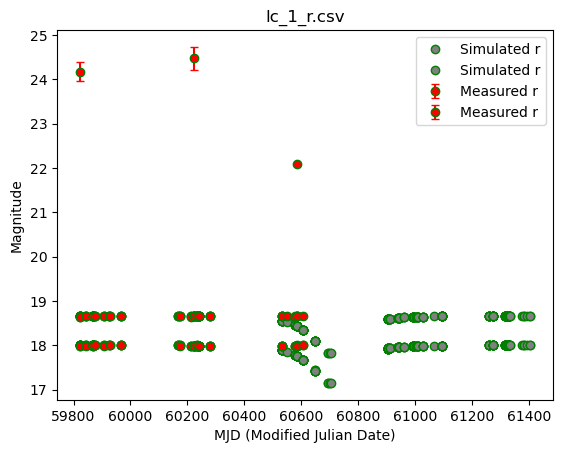

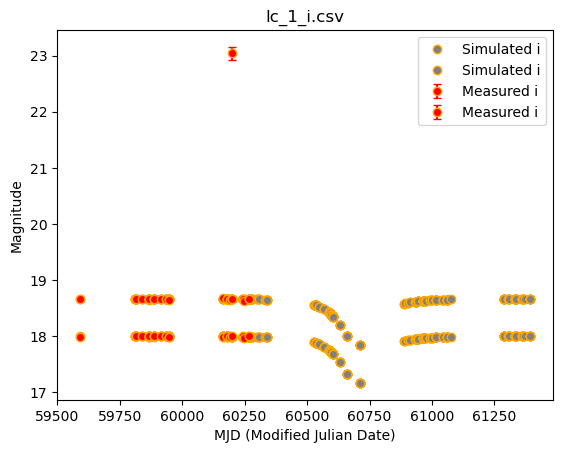

In [5]:
from light_curves import LightCurve
# Plot light curves from a run
import pandas as pd
n=10; lvl = 10; bands="ri"
path = f"runs/run_{n}pts_{lvl}lvl" 

for band in bands:
    path = f"runs/run_{n}pts_{lvl}lvl_{band}/"
    show = False
    for lc_path in sorted([file for file in os.listdir(path) if file.startswith("lc")])[:2]:
        lc = LightCurve(data=pd.read_csv(path+lc_path))
        lc.plot(title = lc_path, band=band, show=show)
        if band == bands[-2]:
            show = True


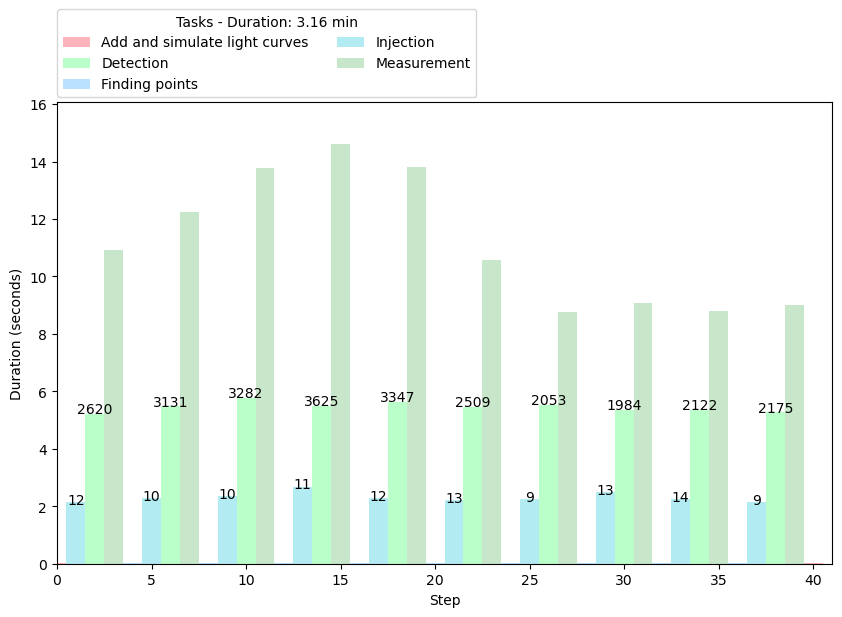

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv("runs/run_30pts_20lvl/time_log.csv")

# Seleccionar las columnas y calcular duraciones
times = df["time"]
task_names = df["task"][2:]
details = df["detail"][2:]
duration = [j - i for i, j in zip(times[:-1], times[1:])][1:]
unique_tasks = sorted(set(task_names))
cmap = plt.get_cmap("tab20")
cmap = plt.get_cmap("Pastel1")
light_colors = [
    "#FFB3BA",  # Rosa claro
    "#BAFFC9",  # Verde menta claro
    "#BAE1FF",  # Azul celeste claro
    "#D1C4E9",  # Lavanda claro
    "#B2EBF2",  # Turquesa claro
    "#C8E6C9",  # Verde claro
    "#E1BEE7",  # Lila pastel
]

from matplotlib.colors import ListedColormap
cmap = ListedColormap(light_colors)
col_task = {task: cmap(i / len(unique_tasks)) for i, task in enumerate(unique_tasks)}
task_colors = [col_task[task] for task in task_names[:-1]]
plt.figure(figsize=(10, 6))
plt.xlim(0, len(duration))
plt.ylim(0, max(duration) * 1.1)

# Ajustar las barras para que tengan el mismo ancho y estén igualmente espaciadas
x_positions = np.arange(len(duration))
bar_width = 1
bars = plt.bar(x_positions, duration, color=task_colors, width=bar_width)

for i, (bar, detail, task) in enumerate(zip(bars, details, task_names)):
    if str(detail) != "nan" and task!= "Finding points":  # Solo agrega texto si `detail` no es None
        plt.text(bar.get_x() + bar.get_width() * 0.5, bar.get_height() * 1.03, 
                 f'{int(detail)}', ha='center', va='center', fontsize=10, color='black')

for task in unique_tasks:
    plt.bar(0, 0, color=col_task[task], label=task)

plt.xlabel("Step")
plt.ylabel("Duration (seconds)")
plt.legend(title=f'Tasks - Duration: {np.sum(duration) / 60:.2f} min', 
           ncol=min([6, len(unique_tasks) // 2]), loc=(0, 1.01))

# Guardar el gráfico
# plt.savefig(f'{self.main_path}time_analysis.png', bbox_inches='tight')
plt.show()


In [75]:
df = pd.read_csv("runs/run_30pts_20lvl/time_log.csv")
t = df["time"]-df["time"][0]
df["time"] = df["time"]-df["time"][0]

In [79]:
df

,task,time,detail
0,Start,0.000000,NaN
1,Plotting sky map,287.351199,NaN
2,Add and simulate light curves,287.370025,NaN
3,Injection,289.524994,12.0
4,Detection,294.749326,2620.0
5,Measurement,305.679543,NaN
6,Finding points,305.695309,12.0
7,Injection,307.973124,10.0
8,Detection,313.447808,3131.0
9,Measurement,325.705491,NaN


In [24]:
n_points = [50,100,150]
levels = [9] 
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt
from time import time


from shapely.geometry import Polygon, Point
from tqdm import tqdm
from lsst.sphgeom import LonLat

grid_size = 0.01  # Resolución de la grilla en grados
ra_range = [48, 76] # Rango de RA en grados
dec_range = [-44,-28]  # Rango de Dec en grados
ra_values = np.arange(ra_range[0], ra_range[1], grid_size)
dec_values = np.arange(dec_range[0], dec_range[1], grid_size)
RA, DEC = np.meshgrid(ra_values, dec_values) 
heatmap = np.zeros_like(RA, dtype=int)

for lvl in levels:
    process = Run(name = f"test", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,2)]
    process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
    for dataId in tqdm(process.calexp_dataIds):
        calexp = Calexp(dataId)
        ra_corners, dec_corners = calexp.get_corners() 
        del calexp
        polygon = Polygon(zip(ra_corners, dec_corners))
        mask = np.array([polygon.contains(Point(ra, dec)) for ra, dec in zip(RA.ravel(), DEC.ravel())])
        mask = mask.reshape(RA.shape)
        heatmap += mask
                
    
    plt.figure(figsize=(10, 8))
    plt.imshow(
        heatmap,
        extent=(ra_values[0], ra_values[-1], dec_values[0], dec_values[-1]),
        origin='lower',
        aspect='auto',
        cmap='hot'
    )
    plt.colorbar(label='Número de superposiciones')
    plt.xlabel('RA (grados)')
    plt.ylabel('Dec (grados)')
    plt.title(f'Number of calexp map for HTM level = {lvl}')
    plt.show()

    


(ra,dec) = (57.59451632893858, -32.481152201226145)/nHTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
  5%|▌         | 27/514 [31:09<9:22:02, 69.24s/it]


ValueError: Failure from formatter 'lsst.obs.base.formatters.fitsExposure.FitsExposureFormatter' for dataset a97ca9d2-34ce-48c1-b3cb-e8a0fef40145 (calexp from s3://butler-us-central1-panda-dev/dc2/2.2i/runs/DP0.2/v23_0_0_rc5/PREOPS-905/20211219T033213Z/calexp/20221013/i/i_sim_1.4/211142/calexp_LSSTCam-imSim_i_i_sim_1_4_211142_R21_S20_2_2i_runs_DP0_2_v23_0_0_rc5_PREOPS-905_20211219T033213Z.fits): badly formed hexadecimal UUID string

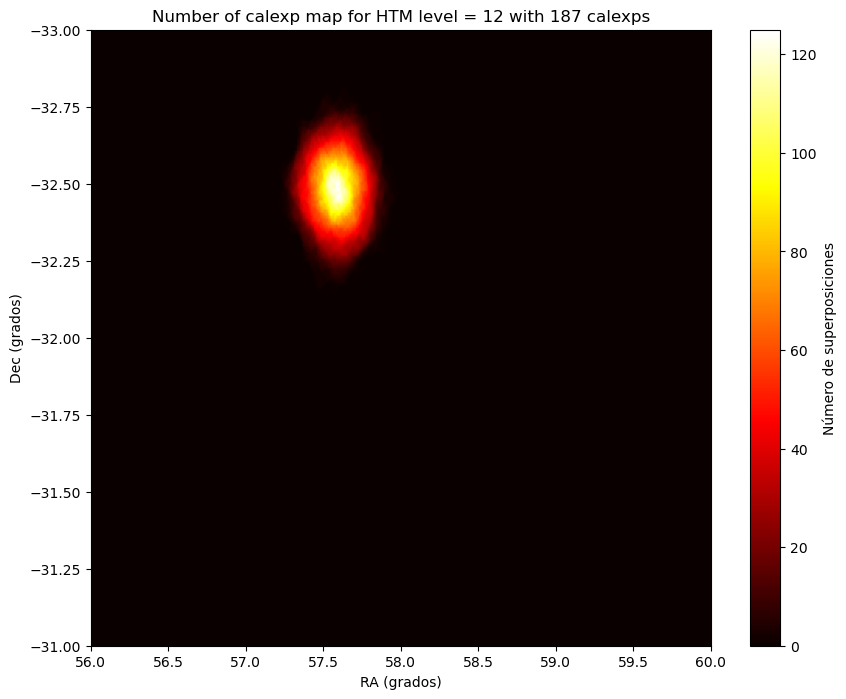

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(
    heatmap,
    extent=(ra_values[0], ra_values[-1], dec_values[0], dec_values[-1]),
    origin='lower',
    aspect='auto',
    cmap='hot'
)
plt.colorbar(label='Número de superposiciones')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.xlim(56,60)
plt.ylim(-31, -33)
plt.title(f'Number of calexp map for HTM level = {lvl} with {len(process.calexp_dataIds)} calexps')
plt.show()

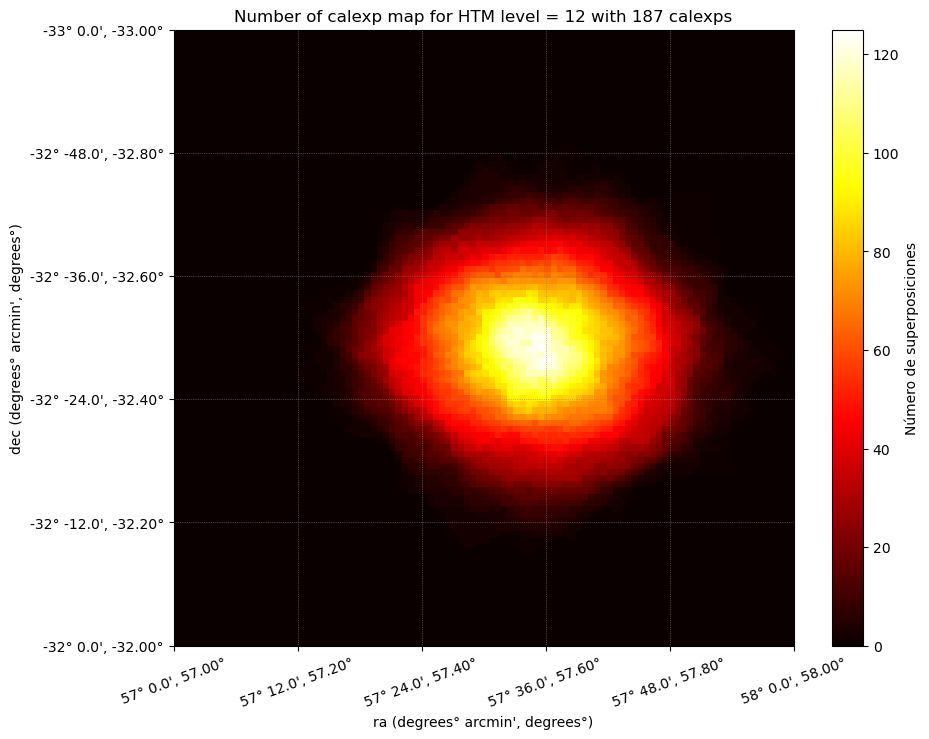

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Función para convertir grados a grados y minutos de arco
def format_degrees_to_dms(x, pos):
    degrees = int(x)
    arcminutes = (x - degrees) * 60
    return f'{degrees}° {arcminutes:.1f}\', {x:.2f}°'

plt.figure(figsize=(10, 8))
plt.imshow(
    heatmap,
    extent=(ra_values[0], ra_values[-1], dec_values[0], dec_values[-1]),
    origin='lower',
    aspect='auto',
    cmap='hot'
)
plt.colorbar(label='Número de superposiciones')
plt.ylabel('dec (degrees° arcmin\', degrees°)')
plt.xlabel('ra (degrees° arcmin\', degrees°)')  # Etiqueta del eje Y
plt.xticks(rotation=20)  # Rotar los ticks del eje X

# Formatear el eje y (Dec) para mostrar grados, minutos y grados decimales
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_degrees_to_dms))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_degrees_to_dms))

plt.xlim(57, 58)
plt.ylim(-32, -33)
plt.title(f'Number of calexp map for HTM level = {lvl} with {len(process.calexp_dataIds)} calexps')
plt.grid(True, linestyle=':', color='gray', linewidth=0.5)
plt.savefig("calexps_overlap_lvl12.png", bbox_inches='tight')


### Time and calexp analysis

runs/run_100pts_11lvl_i/time_log.csv wasn't find
runs/run_100pts_10lvl_r/time_log.csv wasn't find
runs/run_100pts_10lvl_i/time_log.csv wasn't find
runs/run_100pts_9lvl_r/time_log.csv wasn't find
runs/run_100pts_9lvl_i/time_log.csv wasn't find


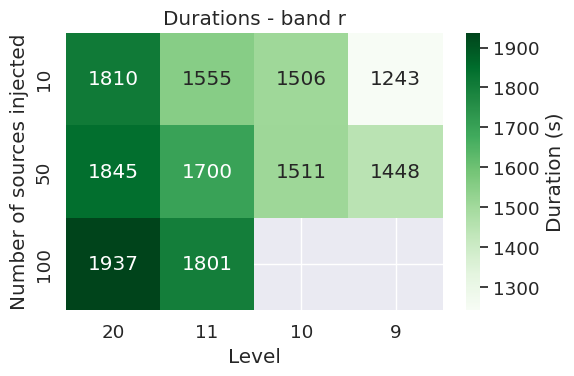

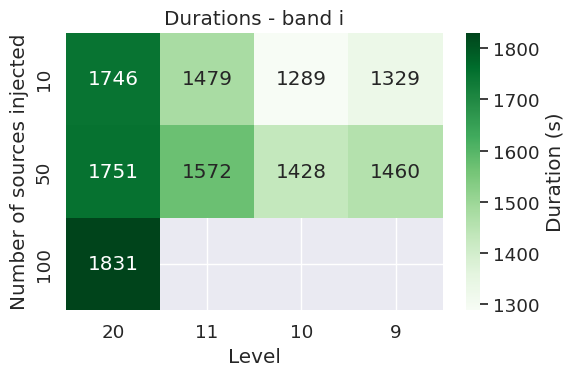

In [68]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
levels = [20, 11, 10, 9]
n_points = [10, 50, 100]
bands = "ri"
durations = {band: pd.DataFrame(index=n_points, columns=levels, dtype=float) for band in bands}
root_dir = "runs"
for n in n_points:
    for lvl in levels:
        for band in bands:
            folder_name = f"run_{n}pts_{lvl}lvl_{band}"
            time_log_path = os.path.join(root_dir, folder_name, "time_log.csv")
            
            if os.path.exists(time_log_path):
                try:
                    df = pd.read_csv(time_log_path)
                    duration = df["time"].iloc[-1] - df["time"].iloc[0]
                    durations[band].at[n, lvl] = duration
                
                except Exception as e:
                    print(f"Error processing {folder_name}: {e}")
            else:
                print(f"{time_log_path} wasn't find")


output_dir = os.path.join(root_dir, "heatmaps")
os.makedirs(output_dir, exist_ok=True)

for band, df in durations.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(df, annot=True, fmt=".0f", cmap="Greens", cbar_kws={'label': 'Duration (s)'})
    plt.title(f"Durations - band {band}")
    plt.xlabel("Level")
    plt.ylabel("Number of sources injected")
    plt.tight_layout()
    plt.show()
    # Guardar figura
    plt.savefig(os.path.join("analysis", f"heatmap_band_{band}.png"))
    plt.close()


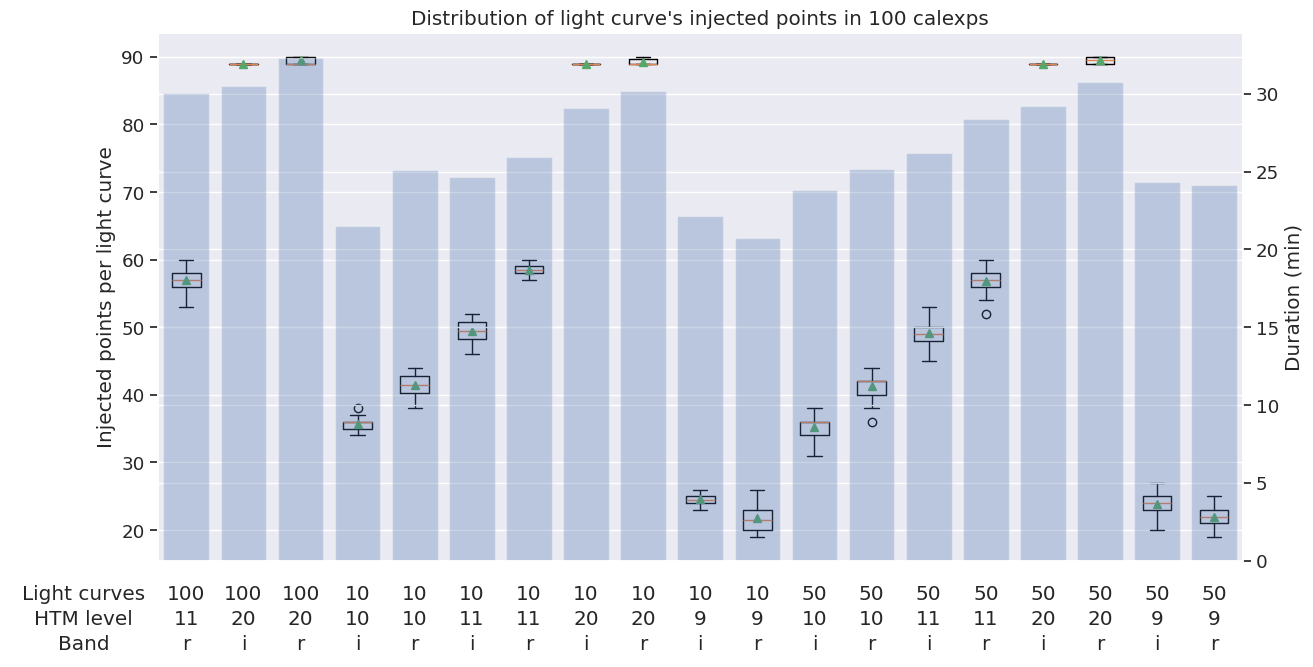

In [82]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

main_folder = "runs/"
data_counts = []
pts_values = []
lvl_values = []
band_values = []

for subfolder in sorted([file for file in os.listdir(main_folder) if re.match(r"run_\d+pts_\d+lvl_[ir]$", file)]):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(r'run_(\d+)pts_(\d+)lvl_([ir])$', subfolder)
        if match:
            pts, lvl, band = match.groups()
            pts_values.append(pts)
            lvl_values.append(lvl)
            band_values.append(band)

            mag_counts = []
            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(subfolder_path, file)
                    try:
                        df = pd.read_csv(file_path)
                        if "mag" in df.columns:
                            mag_count = df["mag"].count()
                            mag_counts.append(mag_count)
                    except Exception as e:
                        print(f"Error leyendo {file_path}: {e}")
            if mag_counts:
                data_counts.append(mag_counts)

# Crear gráficos
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 1, height_ratios=[9, 1], hspace=0.1)


ax_boxplot = fig.add_subplot(gs[0])
ax_boxplot.boxplot(data_counts, showmeans=True)
ax_boxplot.set_ylabel("Injected points per light curve")
ax_boxplot.set_title("Distribution of light curve's injected points in 100 calexps")
ticks_pos = ax_boxplot.get_xticks()
ax_boxplot.set_xticks([])
ax_bar = ax_boxplot.twinx()
ax_bar.bar(ticks_pos, [durations[b][float(l)][float(p)]/60 for b, l, p in zip(band_values, lvl_values, pts_values)], alpha = 0.3) 
ax_bar.set_ylabel("Duration (min)")

ax_table = fig.add_subplot(gs[1])
ax_table.axis("off")

table_data = [pts_values, lvl_values, band_values]
row_labels = ["Light curves", "HTM level", "Band"]
table = ax_table.table(cellText=table_data, rowLabels=row_labels, loc="center", cellLoc='center', rowLoc='center')

for cell in table.properties()['celld'].values():
    cell.set_linewidth(0)
table.scale(1, 1.5)

output_path = os.path.join("analysis", "injected_points_per_lc_analysis.png")
plt.savefig(output_path)
plt.show()



In [81]:
[durations["r"][20][p]/p for p in [10,50,100]]

[181.01092793941498, 36.89695550441742, 19.374340682029725]

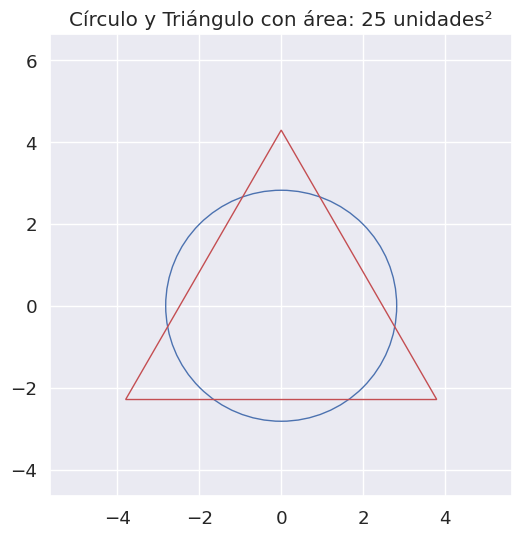

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_triangle_with_same_area_as_circle(area, center=(0, 0)):
    # Área deseada para el círculo
    radius = math.sqrt(area / math.pi)
    
    # Triángulo equilátero con la misma área
    side_length = math.sqrt(4 * area / (math.sqrt(3)))  
    height = math.sqrt(3) / 2 * side_length
    
    # Calcular coordenadas de los vértices del triángulo centrado en 'center'
    vertices = np.array([
        [center[0], center[1] + height / 2],  # vértice superior
        [center[0] - side_length / 2, center[1] - height / 2],  # vértice inferior izquierdo
        [center[0] + side_length / 2, center[1] - height / 2],  # vértice inferior derecho
        [center[0], center[1] + height / 2]  # Cierra el triángulo
    ])
    
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Dibujar el círculo centrado en 'center'
    circle = plt.Circle((0,0), radius, edgecolor='b', facecolor='none', label="Círculo")
    
    # Dibujar el triángulo
    triangle = plt.Polygon(vertices, edgecolor='r', facecolor='none', label="Triángulo")
    
    ax.add_patch(circle)
    ax.add_patch(triangle)
    
    # Configurar límites
    ax.set_xlim(center[0] - 2 * radius, center[0] + 2 * radius)
    ax.set_ylim(center[1] - 2 * radius, center[1] + 2 * radius)
    ax.set_aspect('equal', 'box')

    
    # Mostrar la imagen
    plt.title(f"Círculo y Triángulo con área: {area} unidades²")

    plt.grid(True)
    plt.show()

plot_triangle_with_same_area_as_circle(area=25, center=(0,1))


In [78]:
[np.mean(counts) for counts in data_counts]

[57.06,
 89.0,
 89.48,
 35.7,
 41.4,
 49.5,
 58.5,
 89.0,
 89.3,
 24.6,
 21.8,
 35.18,
 41.26,
 49.18,
 56.84,
 89.0,
 89.5,
 23.86,
 22.0]

In [76]:
lvl_values, pts_values, band_values

(['11',
  '20',
  '20',
  '10',
  '10',
  '11',
  '11',
  '20',
  '20',
  '9',
  '9',
  '10',
  '10',
  '11',
  '11',
  '20',
  '20',
  '9',
  '9'],
 ['100',
  '100',
  '100',
  '10',
  '10',
  '10',
  '10',
  '10',
  '10',
  '10',
  '10',
  '50',
  '50',
  '50',
  '50',
  '50',
  '50',
  '50',
  '50'],
 ['r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r',
  'i',
  'r'])